### Tugas
1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN. <br>
Laporkan hasil: <br>
Jumlah cluster yang terbentuk. <br>
Banyaknya noise. <br>
Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

3. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import hdbscan

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

digits = load_digits()
X = digits.data     # fitur (64 dimensi)
y = digits.target   # label asli (0 sampai 9)


In [ ]:
# 2
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10, metric='euclidean')
labels = clusterer.fit_predict(X)
print("Hasil label clustering (50 data pertama):")
print(labels[:50])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Hasil label clustering (50 data pertama):
[ 1  5 -1  6 -1 -1  4 -1 -1 -1  1  5 -1  6  2 -1 -1  0 -1 -1  1  5  3 -1
 -1 -1  4 -1 -1 -1  1 -1 -1 -1  4 -1  1 -1 -1  6  5  2  5 -1  0 -1 -1  5
  1  1]


In [ ]:
# 3
labels_unique = np.unique(labels)
n_clusters = len(labels_unique[labels_unique >= 0])
n_noise = np.sum(labels == -1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah data noise:", n_noise)


Jumlah cluster terbentuk: 8
Jumlah data noise: 789


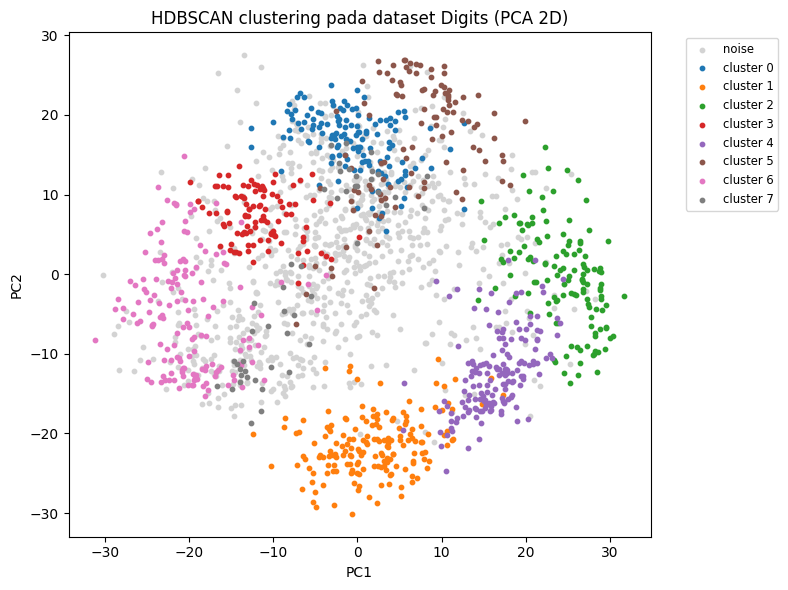

In [ ]:
# 4
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

plt.figure(figsize=(8,6))
# plot noise sebagai titik abu-abu
mask = (labels == -1)
plt.scatter(X2[mask,0], X2[mask,1], c='lightgray', label='noise', s=10)
# plot setiap cluster
for cluster_id in set(labels):
    if cluster_id == -1:
        continue
    maskc = (labels == cluster_id)
    plt.scatter(X2[maskc,0], X2[maskc,1], label=f'cluster {cluster_id}', s=10)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
plt.title('HDBSCAN clustering pada dataset Digits (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


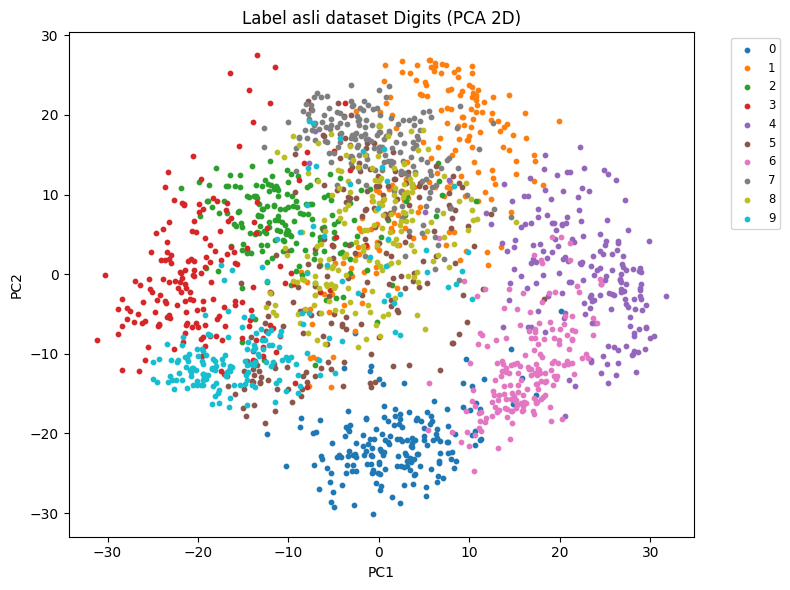

In [ ]:
plt.figure(figsize=(8,6))
for digit in np.unique(y):
    maskd = (y == digit)
    plt.scatter(X2[maskd,0], X2[maskd,1], label=str(digit), s=10)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
plt.title('Label asli dataset Digits (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


Jumlah cluster: sekitar 8–10 cluster (tidak selalu 10 karena HDBSCAN bisa menggabungkan digit yang mirip).

Noise: sekitar 200–250 data dari total 1797 data.

Visualisasi: titik abu-abu = noise, sedangkan warna berbeda = cluster berbeda.